In [1]:
import pandas as pd
from iertools.read import read_sql
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
f = "../osm/011_sc_definidos/run/eplusout.sql"
sd  = read_sql(f,alias=True)
datos = sd.data
# datos

In [3]:
f = '../data/002_processed/Recamara_principal.csv'
rec_p = pd.read_csv(f,index_col=0,parse_dates=True)
rec_p.index = rec_p.index - pd.DateOffset(years=18)

In [4]:
rec_p

,Temp,RH
TIME,,
2006-02-09 12:37:43,24.4,55.8
2006-02-09 13:37:43,25.7,50.7
2006-02-09 14:37:43,26.3,50.6
2006-02-09 15:37:43,27.0,51.6
2006-02-09 16:37:43,26.6,50.7
...,...,...
2006-04-04 11:37:43,26.3,54.4
2006-04-04 12:37:43,26.4,57.4
2006-04-04 13:37:43,26.5,57.1


In [5]:
sd.construction_systems
sc = ['ENTREPISO', 'ENTREPISO REVERSED', 'TECHO', 'MUROSEXTERIORES',
       'MUROSINTERIOR',
       'PUERTAINTERIOR', 'PUERTAEXTERIOR',
       'VENTANA']

In [6]:
zonas = [zona for zona in datos.columns if "Ti_" in zona]
zonas

['Ti_BANIO2',
 'Ti_BANIO',
 'Ti_CLOSET',
 'Ti_COCINA',
 'Ti_ESCALERAS2',
 'Ti_ESCALERAS',
 'Ti_RECAMARA2',
 'Ti_RECAMARA3',
 'Ti_RPRINCIPAL',
 'Ti_SALACOMEDOR']

(13189.0, 13209.0)

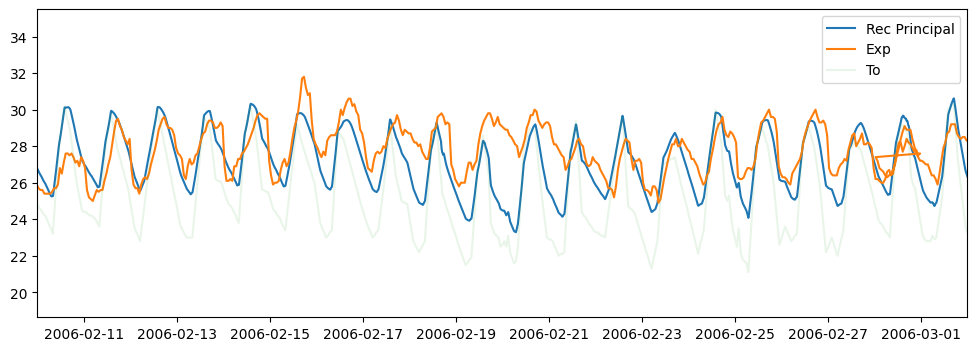

In [7]:
fig, ax = plt.subplots(figsize=(12,4))

f1 = parse('2006-02-10')
f2 = f1 + pd.Timedelta('20d')

ax.plot(datos.Ti_RPRINCIPAL,label="Rec Principal")
ax.plot(rec_p.Temp,label="Exp")
ax.plot(datos.To,label="To",alpha=0.1)

ax.legend()
ax.set_xlim(f1,f2)